 # Multiple Regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [10]:
def normalize(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    return (X - X_mean) / X_std

In [11]:
class Random_Data:
    def __init__(self, num_features, num_samples, noise_std):
        self.num_features = num_features
        self.num_samples = num_samples
        self.noise_std = noise_std
    def add_noise(self, data):
        return data + np.random.normal(0, self.noise_std, (self.num_samples, self.num_features))
    def generate_data(self):
        weights = np.random.uniform(-1, 1, size=(self.num_features + 1, 1))
        X = np.random.uniform(0, 100, size=(self.num_samples, self.num_features))
        X_norm = normalize(X)
        X_norm = np.concatenate([np.ones((self.num_samples, 1)), X_norm], axis=1)
        print(X.shape, weights.shape)
        y = (X_norm @ weights) + np.random.normal(scale=self.noise_std, size=(self.num_samples, 1))
        print(y.shape)
        return X, y
    def data(self):
        return self.generate_data()

In [12]:
def train_test_split(X, y, test_size=None, train_size=None):
    if test_size is None and train_size is None:
        test_size = 0.25
    if train_size is None:
        train_size = 1 - test_size
    arr_rand = np.random.rand(len(X))
    mask = arr_rand < np.percentile(arr_rand, int(train_size * 100))
    X_train = X[mask]
    y_train = y[mask]
    X_test = X[~mask]
    y_test = y[~mask]
    return X_train, X_test, y_train, y_test

In [13]:
class MultipleRegression:
    def __init__(self, X, y, alpha, reg=None, lambda_reg=1.0):
        self.X = X
        self.X_norm = np.insert(normalize(X), 0, 1, axis=1)
        self.y = y.reshape(-1, 1)
        self.alpha = alpha
        self.reg = reg
        self.lambda_reg = lambda_reg
        self.Theta = np.ones(shape=(self.X_norm.shape[1], 1), dtype='float64')
        self.m = len(X)
    def reg_term(self, theta):
        if self.reg is None:
            return np.zeros(theta.shape)
        if self.reg == 'l1':
            lasso_reg_term = (self.lambda_reg / self.m) * np.sign(theta)
            lasso_reg_term[0] = 0
            return lasso_reg_term
        ridge_reg_term = (self.lambda_reg / self.m) * theta
        ridge_reg_term[0] = 0
        return ridge_reg_term
    def batch_gradient_descent(self, num_iter):
        iterations = 0
        while iterations < num_iter:
            loss_derivative = (self.X_norm.T @ ((self.X_norm @ self.Theta) - self.y)) / self.m
            loss_derivative += self.reg_term(self.Theta) 
            if np.linalg.norm(loss_derivative) < 1e-5:
                break
            self.Theta = self.Theta - (self.alpha * loss_derivative)
            iterations += 1
        print('Iterations: ', iterations)
    def predict(self, X):
        X_norm = np.insert(normalize(X), 0, 1, axis=1)
        y = X_norm @ self.Theta
        return y
    def plot(self):
        ax = plt.axes(projection='3d')
        ax.scatter3D(self.X[:, 0], self.X[:, 1], self.y, color='green')
        ax.scatter3D(self.X[:, 0], self.X[:, 1], self.predict(self.X), color='red')
    def weight_vector(self):
        print(self.Theta)
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        SS_tot = ((y_test - np.mean(y_test)) ** 2).sum()
        SS_res = ((y_test - y_pred) ** 2).sum()
        r2_score = 1 - SS_res / SS_tot
        return r2_score

In [14]:
X, y = Random_Data(num_features=2, num_samples=500, noise_std=1).data()

(500, 2) (3, 1)
(500, 1)


In [15]:
X[:5]

array([[73.22834268, 60.32353772],
       [24.78510866, 10.97621271],
       [ 7.35338669, 89.42352448],
       [75.67706704, 87.07681776],
       [89.09371857, 11.8330136 ]])

In [16]:
y[:5]

array([[ 8.83366701e-02],
       [ 4.81407477e-03],
       [-1.49284410e+00],
       [-6.37681402e-04],
       [ 3.55280315e+00]])

In [17]:
X.shape, y.shape

((500, 2), (500, 1))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [19]:
X_train[:5]

array([[73.22834268, 60.32353772],
       [24.78510866, 10.97621271],
       [ 7.35338669, 89.42352448],
       [75.67706704, 87.07681776],
       [89.09371857, 11.8330136 ]])

In [20]:
X_test[:5]

array([[10.39999429, 98.00508203],
       [18.57421304, 79.2774976 ],
       [43.41576958, 25.55721023],
       [49.91127689, 30.48390408],
       [48.17596428, 26.24323178]])

In [21]:
y_train[:5]

array([[ 8.83366701e-02],
       [ 4.81407477e-03],
       [-1.49284410e+00],
       [-6.37681402e-04],
       [ 3.55280315e+00]])

In [22]:
y_test[:5]

array([[-3.04612882],
       [-0.41924506],
       [ 0.95327595],
       [ 1.79167921],
       [ 3.51132078]])

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 2), (100, 2), (400, 1), (100, 1))

### No Regularization

In [24]:
mul_reg = MultipleRegression(X_train, y_train, alpha=1e-1)

In [25]:
mul_reg.batch_gradient_descent(num_iter=1000)

Iterations:  117


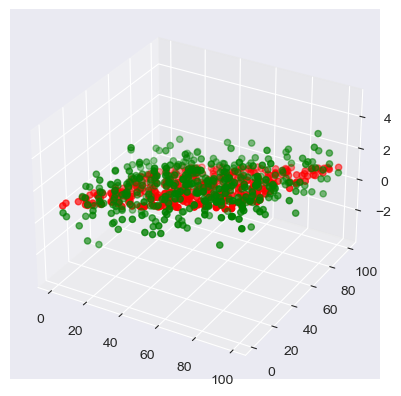

In [26]:
mul_reg.plot()

In [27]:
mul_reg.weight_vector()

[[ 0.86296187]
 [ 0.90832304]
 [-0.89942827]]


In [28]:
mul_reg.score(X_test, y_test)

0.6186294107869477

### Lasso Regularization

In [29]:
mul_reg_lasso = MultipleRegression(X_train, y_train, alpha=1e-1, reg='l1', lambda_reg=25)

In [30]:
mul_reg_lasso.batch_gradient_descent(num_iter=1000)

Iterations:  116


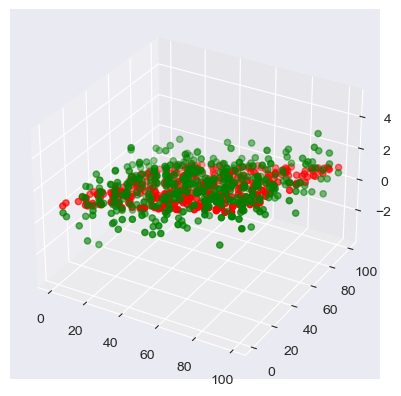

In [31]:
mul_reg_lasso.plot()

In [32]:
mul_reg_lasso.weight_vector()

[[ 0.86296194]
 [ 0.84732749]
 [-0.83843232]]


In [33]:
mul_reg_lasso.score(X_test, y_test)

0.6116578191254325

### Ridge Regularization

In [34]:
mul_reg_ridge = MultipleRegression(X_train, y_train, alpha=1e-1, reg='l2', lambda_reg=25)

In [35]:
mul_reg_ridge.batch_gradient_descent(num_iter=1000)

Iterations:  110


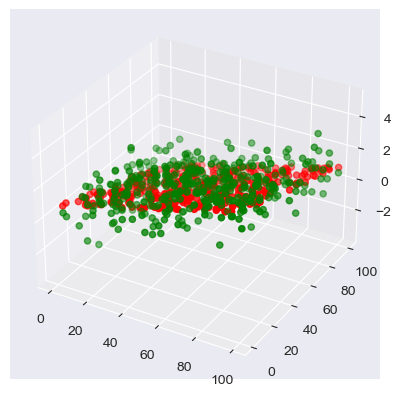

In [36]:
mul_reg_ridge.plot()

In [37]:
mul_reg_ridge.weight_vector()

[[ 0.86296253]
 [ 0.85609218]
 [-0.84773288]]


In [30]:
mul_reg_ridge.score(X_test, y_test)

0.5908624816772596